In [2]:
# do not touch this cell 
%load_ext jupyter_record


The jupyter_record extension is already loaded. To reload it, use:
  %reload_ext jupyter_record


In [51]:
%%git_commit

import pandas as pd
import numpy as np

In [6]:
%%git_commit
dataset.keys()

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

In [19]:
%%git_commit

dropped_column = ['DepTime', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'ActualElapsedTime', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'DistanceGroup', 'DivAirportLandings']

In [20]:
%%git_commit

for column in dropped_column:
    dataset = dataset.drop(column, axis = 1)
    

In [26]:
%%git_commit
df = dataset.dropna()

# Evaluate Departure Delay 


TODOS
- Define Subset of features
- For each feature, convert to appropriate value
- Test time series prediction, normal prediction


In [4]:
%%git_commit

training = pd.read_csv('../archive/Combined_Flights_2018.csv')
testing = pd.read_csv('../archive/Combined_Flights_2019.csv')


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [5]:
%%git_commit

testing


NameError: name 'testing' is not defined

In [6]:
%%git_commit
training

NameError: name 'training' is not defined

In [7]:
%%git_commit

training = training.dropna()
testing = testing.dropna()

In [36]:
%%git_commit

dropped_column = ['Flight_Number_Marketing_Airline', 'Flight_Number_Operating_Airline', 'DepTime', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'ActualElapsedTime', 'DepDelayMinutes', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'DistanceGroup', 'DivAirportLandings']




In [9]:
%%git_commit

for column in dropped_column:
    training = training.drop(column, axis = 1)
    testing = testing.drop(column, axis = 1)
    

In [10]:
%%git_commit

training.keys()


Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'CRSElapsedTime', 'Distance', 'Year', 'Quarter', 'Month',
       'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network',
       'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline',
       'IATA_Code_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'OriginAirportID', 'OriginAirportSeqID',
       'OriginCityMarketID', 'OriginCityName', 'OriginState',
       'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'DestCityName', 'DestState',
       'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15', 'CRSArrTime'],
      dtype='object')

In [11]:
%%git_commit

d2_column = ['FlightDate', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners' ,  'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline', 'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline', 'OriginAirportSeqID', 'DestAirportSeqID', 'CRSArrTime', 'DestStateName', 'DestState', 'DestCityName', 'OriginStateName', 'OriginState', 'OriginCityName','Year',  'Diverted', 'Cancelled', 'Tail_Number']




In [12]:
%%git_commit

for column in d2_column:
    training = training.drop(column, axis = 1)
    testing = testing.drop(column, axis = 1)

In [13]:
%%git_commit

testing.keys()

Index(['Airline', 'Origin', 'Dest', 'CRSDepTime', 'CRSElapsedTime', 'Distance',
       'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Operating_Airline',
       'OriginAirportID', 'OriginCityMarketID', 'OriginStateFips', 'OriginWac',
       'DestAirportID', 'DestCityMarketID', 'DestStateFips', 'DestWac',
       'DepDel15'],
      dtype='object')

In [14]:
%%git_commit

for col in training:
    print(col)
    print(training[col].unique())

Airline
['Endeavor Air Inc.' 'JetBlue Airways' 'ExpressJet Airlines Inc.'
 'Allegiant Air' 'Hawaiian Airlines Inc.' 'Spirit Air Lines'
 'SkyWest Airlines Inc.' 'Frontier Airlines Inc.' 'Southwest Airlines Co.'
 'Mesa Airlines Inc.' 'Republic Airlines' 'Delta Air Lines Inc.'
 'United Air Lines Inc.' 'Alaska Airlines Inc.' 'Horizon Air'
 'Commutair Aka Champlain Enterprises, Inc.' 'Trans States Airlines'
 'GoJet Airlines, LLC d/b/a United Express' 'Air Wisconsin Airlines Corp'
 'Cape Air' 'Compass Airlines' 'Virgin America' 'Peninsula Airways Inc.'
 'Envoy Air' 'American Airlines Inc.' 'Comair Inc.'
 'Capital Cargo International' 'Empire Airlines Inc.']
Origin
['ABY' 'ATL' 'MOB' 'BUF' 'BTV' 'CVG' 'LGA' 'CHO' 'EWN' 'MCI' 'MGM' 'MSP'
 'DCA' 'FAY' 'OAJ' 'STL' 'CWA' 'DTW' 'RDU' 'SRQ' 'AEX' 'AUS' 'CSG' 'EVV'
 'IND' 'CLE' 'PIA' 'TRI' 'BGR' 'IAD' 'PWM' 'TYS' 'GSO' 'AVL' 'BTR' 'MKE'
 'CMH' 'GRR' 'GSP' 'BIS' 'ORD' 'ROC' 'CHA' 'FSM' 'JAX' 'BOS' 'GRB' 'TUL'
 'VLD' 'CRW' 'IAH' 'XNA' 'JAN' 'CHS' 'ROA

['9E' 'B6' 'EV' 'G4' 'HA' 'NK' 'OO' 'F9' 'WN' 'YV' 'YX' 'DL' 'UA' 'AS'
 'QX' 'C5' 'AX' 'G7' 'ZW' '9K' 'CP' 'VX' 'KS' 'MQ' 'AA' 'OH' 'PT' 'EM']
OriginAirportID
[10146 10397 13422 10792 10785 11193 12953 10990 11617 13198 13277 13487
 11278 11641 13795 15016 11203 11433 14492 14986 10185 10423 11150 11612
 12339 11042 14108 15323 10581 12264 14321 15412 11995 10431 10781 13342
 11066 11986 11996 10627 13930 14576 10980 11778 12451 10721 11977 15370
 15607 11146 12266 15919 12448 10994 14574 11898 15096 13230 14683 10685
 12951 10693 14100 10731 13931 11953 11298 13871 15304 14685 10821 13244
 13184 12945 11057 11267 13433 11637 10868 11423 14122 11308 13296 12323
 14783 11537 10529 13204 14524 14814 13495 12217 15249 12884 12992 11982
 13485 10408 12206 12197 10874 11618 14635 10732 14027 11697 14869 14254
 12478 14831 12889 12954 12892 14771 14843 12191 11292 14747 15024 14307
 14057 14679 14570 10257 14107 13796 14262 14893 15027 10800 15070 11252
 13933 10140 11540 12915 12177 14193 1

In [15]:
%%git_commit

one_hot = ['DestWac', 'DestStateFips', 'DestCityMarketID', 'DestAirportID', 'OriginWac', 'OriginStateFips', 'OriginCityMarketID', 'OriginAirportID', 'Operating_Airline', 'DayOfWeek', 'Month', 'Quarter', 'Dest', 'Origin', 'Airline' ]

In [16]:
%%git_commit

from sklearn.preprocessing import OneHotEncoder



In [17]:
%%git_commit

encode = OneHotEncoder(handle_unknown = 'ignore')

array = []
array_test = []
for hot in one_hot:
    print(hot)
    x = encode.fit_transform(training[hot].to_numpy().reshape(-1, 1))
    y = encode.transform(testing[hot].to_numpy().reshape(-1, 1))
    print(x.shape)
    array.append(x)
    array_test.append(y)


DestWac
(5578618, 52)
DestStateFips
(5578618, 52)
DestCityMarketID
(5578618, 346)
DestAirportID
(5578618, 370)
OriginWac
(5578618, 52)
OriginStateFips
(5578618, 52)
OriginCityMarketID
(5578618, 346)
OriginAirportID
(5578618, 370)
Operating_Airline
(5578618, 28)
DayOfWeek
(5578618, 7)
Month
(5578618, 12)
Quarter
(5578618, 4)
Dest
(5578618, 370)
Origin
(5578618, 370)
Airline
(5578618, 28)


In [18]:
%%git_commit

not_hot = []
for key in training.keys():
    if key not in one_hot:
        not_hot.append(key)
        
print(not_hot)

['CRSDepTime', 'CRSElapsedTime', 'Distance', 'DayofMonth', 'DepDel15']


In [19]:
%%git_commit

for i in range(len(array)):
    print(array[i].shape)



(5578618, 52)
(5578618, 52)
(5578618, 346)
(5578618, 370)
(5578618, 52)
(5578618, 52)
(5578618, 346)
(5578618, 370)
(5578618, 28)
(5578618, 7)
(5578618, 12)
(5578618, 4)
(5578618, 370)
(5578618, 370)
(5578618, 28)


In [20]:
%%git_commit

from scipy.sparse import hstack



In [21]:
%%git_commit

col_2 = ['CRSDepTime', 'CRSElapsedTime', 'Distance', 'DayofMonth']

for col in col_2:
    x = training[col].to_numpy().reshape(-1, 1)
    y = testing[col].to_numpy().reshape(-1, 1)
    array.append(x)
    array_test.append(y)

In [22]:
%%git_commit

X_train = hstack(array)
X_test = hstack(array_test)

In [23]:
%%git_commit

y_train = training['DepDel15'].to_numpy().reshape(-1)
y_test = testing['DepDel15'].to_numpy().reshape(-1)


In [24]:
%%git_commit

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5578618, 2463)
(7917263, 2463)
(5578618,)
(7917263,)


In [25]:
%%git_commit

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [32]:
%%git_commit


model = RandomForestClassifier(max_samples = 0.01, min_samples_leaf = 100)
model.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.01, min_samples_leaf=100)

In [33]:
%%git_commit

y_out = model.predict(X_test)



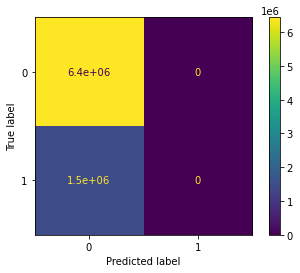

In [34]:
%%git_commit


y_out = model.predict(X_test)
matrix = confusion_matrix(y_test, y_out)
display = ConfusionMatrixDisplay(matrix)
display.plot()
plt.show()

# Evaluate Arrival Delay



TODOS
- Define Subset of features
- For each feature, convert to appropriate value
- Test time series prediction, normal prediction


In [ ]:
%%git_commit

training = pd.read_csv('../archive/Combined_Flights_2018.csv').sample(100000)
testing = pd.read_csv('../archive/Combined_Flights_2019.csv').sample(100000)


In [ ]:
%%git_commit


training = training.dropna()
testing = testing.dropna()


In [ ]:
%%git_commit


dropped_column = ['ArrDel15', 'Flight_Number_Marketing_Airline', 'Flight_Number_Operating_Airline', 'DepDelay', 'ArrTime', 'AirTime', 'ActualElapsedTime', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrDelay', 'ArrivalDelayGroups', 'ArrTimeBlk', 'DistanceGroup', 'DivAirportLandings']




In [ ]:
%%git_commit

for column in dropped_column:
    training = training.drop(column, axis = 1)
    testing = testing.drop(column, axis = 1)
    
    

In [ ]:
%%git_commit

training.keys()


In [ ]:
%%git_commit

d2_column = ['FlightDate', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners' ,  'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline', 'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline', 'OriginAirportSeqID', 'DestAirportSeqID', 'CRSArrTime', 'DestStateName', 'DestState', 'DestCityName', 'OriginStateName', 'OriginState', 'OriginCityName','Year',  'Diverted', 'Cancelled', 'Tail_Number']


In [ ]:
%%git_commit

for column in d2_column:
    training = training.drop(column, axis = 1)
    testing = testing.drop(column, axis = 1)


In [ ]:
%%git_commit

testing.keys()


In [ ]:
%%git_commit

from sklearn.preprocessing import OneHotEncoder

encode = OneHotEncoder(handle_unknown = 'ignore')

one_hot = ['DestWac', 'DestStateFips', 'DestCityMarketID', 'DestAirportID', 'OriginWac', 'OriginStateFips', 'OriginCityMarketID', 'OriginAirportID', 'Operating_Airline', 'DayOfWeek', 'Month', 'Quarter', 'Dest', 'Origin', 'Airline' ]

array = []
array_test = []
for hot in one_hot:
    print(hot)
    x = encode.fit_transform(training[hot].to_numpy().reshape(-1, 1))
    y = encode.transform(testing[hot].to_numpy().reshape(-1, 1))
    print(x.shape)
    array.append(x)
    array_test.append(y)


In [ ]:
%%git_commit

not_hot = []
for key in training.keys():
    if key not in one_hot:
        not_hot.append(key)
        
print(not_hot)


In [ ]:
%%git_commit

from scipy.sparse import hstack


In [ ]:
%%git_commit


#col_2 = ['CRSDepTime', 'DepTime', 'DepDelayMinutes', 'CRSElapsedTime', 'Distance', 'DayofMonth', 'DepDel15']

col_2 = ['CRSDepTime', 'DepTime', 'CRSElapsedTime', 'Distance', 'DayofMonth']

for col in col_2:
    x = training[col].to_numpy().reshape(-1, 1)
    y = testing[col].to_numpy().reshape(-1, 1)
    array.append(x)
    array_test.append(y)
    

In [ ]:
%%git_commit

X_train = hstack(array)
X_test = hstack(array_test)


In [ ]:
%%git_commit

y_train = training['ArrDelayMinutes'].to_numpy().reshape(-1)
y_test = testing['ArrDelayMinutes'].to_numpy().reshape(-1)


In [ ]:
%%git_commit

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


In [ ]:
%%git_commit

y_test[y_test > 500] = 500
y_train[y_train > 500] = 500

In [ ]:
%%git_commit
import matplotlib.pyplot as plt
plt.hist(y_test, bins=9)


In [ ]:
%%git_commit

# REGRESSION TEST

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LinearRegression


In [ ]:
%%git_commit

#model = RandomForestRegressor(max_samples = 0.01, min_samples_leaf = 100)
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
%%git_commit

y_out = model.predict(X_test)
print(explained_variance_score(y_test, y_out))

In [ ]:
%%git_commit
print(np.sum(y_out))

In [89]:
%%git_commit


model = RandomForestClassifier(max_samples = 0.01, min_samples_leaf = 100)
model.fit(X_train, y_train)


RandomForestClassifier(max_samples=0.01, min_samples_leaf=100)

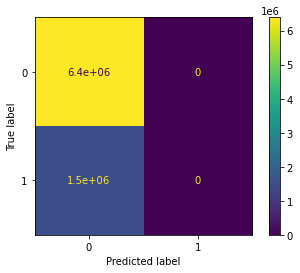

In [90]:
%%git_commit

y_out = model.predict(X_test)
matrix = confusion_matrix(y_test, y_out)
display = ConfusionMatrixDisplay(matrix)
display.plot()
plt.show()


In [91]:
%%git_commit

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_out))


0.8070729745873038


In [ ]:
%%git_commit
